<a href="https://colab.research.google.com/github/hemant-yadavv/bankruptcy-prediction/blob/main/company_bankruptcy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

## Import

In [ ]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay , classification_report ,f1_score
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
df = pd.read_csv("data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


## Explore

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6819 entries, 0 to 6818

Data columns (total 96 columns):

 #   Column                                                    Non-Null Count  Dtype  

---  ------                                                    --------------  -----  

 0   Bankrupt?                                                 6819 non-null   int64  

 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64

 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64

 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64

 4   _Operating_Gross_Margin                                   6819 non-null   float64

 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64

 6   _Operating_Profit_Rate                                    6819 non-null   float64

 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64

 8   _Afte

In [ ]:
(df.isna().sum() > 0).sum()

0

## We want to calculate the relative frequencies of the classes

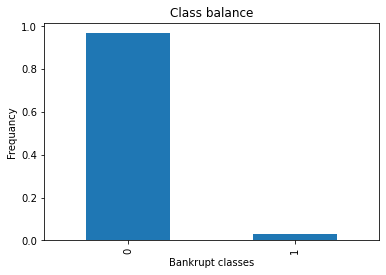

In [ ]:
df['Bankrupt?'].value_counts(normalize= True).plot(kind= 'bar')
plt.xlabel("Bankrupt classes")
plt.ylabel("Frequancy")
plt.title("Class balance");

## Now we show the distributions of the "_Net_Income_to_Total_Assets" column for both groups in the "bankrupt" column

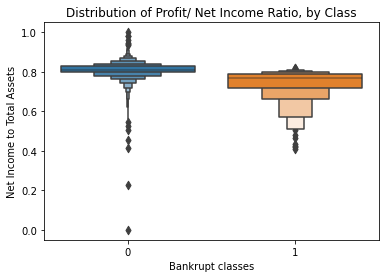

In [ ]:
sns.boxenplot(x="Bankrupt?" , y="_Net_Income_to_Total_Assets" , data=df)
plt.xlabel("Bankrupt classes")
plt.ylabel("Net Income to Total Assets")
plt.title("Distribution of Profit/ Net Income Ratio, by Class");

In [ ]:
df['_Net_Income_to_Total_Assets'].describe()

count    6819.000000
mean        0.807760
std         0.040332
min         0.000000
25%         0.796750
50%         0.810619
75%         0.826455
max         1.000000
Name: _Net_Income_to_Total_Assets, dtype: float64

## We create a histogram to check whether the distrbution is skewed significantly or not

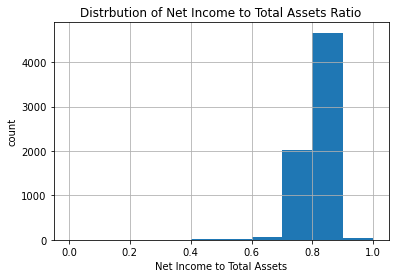

In [ ]:
df["_Net_Income_to_Total_Assets"].hist()
plt.xlabel("Net Income to Total Assets")
plt.ylabel("count")
plt.title("Distrbution of Net Income to Total Assets Ratio");

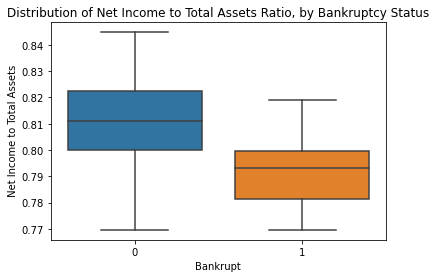

In [ ]:
q1 , q9 = df['_Net_Income_to_Total_Assets'].quantile([0.1,0.9])
mask = df["_Net_Income_to_Total_Assets"].between(q1 , q9)
sns.boxplot(x='Bankrupt?' , y='_Net_Income_to_Total_Assets', data= df[mask])
plt.xlabel("Bankrupt")
plt.ylabel(" Net Income to Total Assets")
plt.title("Distribution of Net Income to Total Assets Ratio, by Bankruptcy Status");

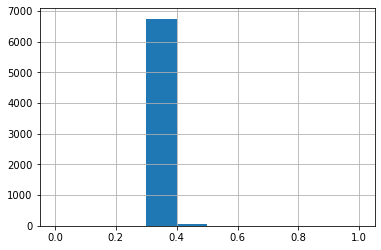

In [ ]:
df['_Borrowing_dependency'].hist();

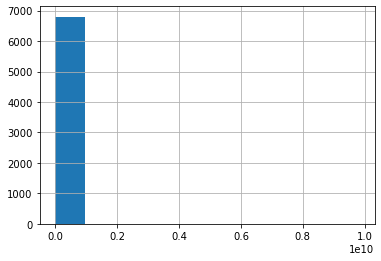

In [ ]:
df['_Total_assets_to_GNP_price'].hist();

## Multicollinearity

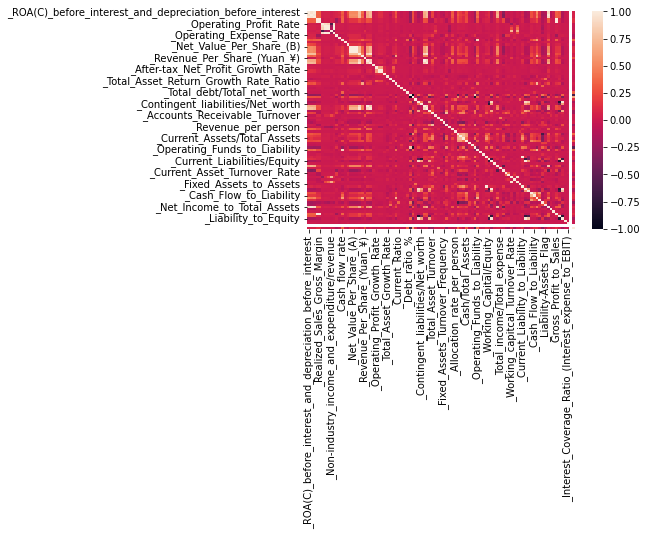

In [ ]:
corr = df.drop(columns=['Bankrupt?']).corr()
sns.heatmap(corr);

## Split

In [ ]:
target = "Bankrupt?"
X = df.drop(columns=[target])
y = df[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6819, 95)

y shape: (6819,)


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5455, 95)

y_train shape: (5455,)

X_test shape: (1364, 95)

y_test shape: (1364,)


## Resample

In [ ]:
over_sampler = RandomOverSampler(random_state=42)
X_train_over , y_train_over = over_sampler.fit_resample(X_train , y_train)
print(X_train_over.shape)
X_train_over.head()

(10572, 95)


,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
0,0.498513,0.542848,0.544622,0.599194,0.599036,0.998986,0.797412,0.809330,0.303528,0.781593,...,0.801313,0.005821,0.623649,0.599196,0.840580,0.282564,0.027239,0.566658,1,0.022512
1,0.506606,0.562309,0.558863,0.609334,0.609334,0.999027,0.797450,0.809375,0.303508,0.781637,...,0.810914,0.000481,0.623932,0.609332,0.841339,0.280570,0.026843,0.565395,1,0.026670
2,0.508799,0.561001,0.554687,0.614242,0.614055,0.999094,0.797533,0.809424,0.303514,0.781692,...,0.809740,0.001397,0.623714,0.614241,0.840969,0.277772,0.026864,0.565484,1,0.041556
3,0.499976,0.562527,0.546764,0.597825,0.597825,0.999004,0.797411,0.809329,0.303490,0.781590,...,0.810082,0.000998,0.623986,0.597824,0.841885,0.286871,0.026951,0.565820,1,0.018173
4,0.477892,0.547700,0.529150,0.600362,0.600362,0.998975,0.797412,0.809333,0.303551,0.781584,...,0.804638,0.002826,0.623845,0.600363,0.840885,0.282073,0.026959,0.565848,1,0.023328


## Build BaseLine

In [ ]:
acc_baseline = y_train.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.969


## iterate

In [ ]:
clf = RandomForestClassifier(random_state=42)

In [ ]:
params= {

    "n_estimators":range(25 , 100 , 25),
    "max_depth": range(10 , 70 , 10)

}
params

{'n_estimators': range(25, 100, 25), 'max_depth': range(10, 70, 10)}

In [ ]:
model = GridSearchCV(

    clf,
    param_grid= params,
    cv=5,
    n_jobs=-1,
    verbose= 1

)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
model.fit(X_train_over , y_train_over)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(10, 70, 10),
                         'n_estimators': range(25, 100, 25)},
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.sort_values('rank_test_score').head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,1.809043,0.074637,0.024687,0.003464,50,50,"{'max_depth': 50, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
16,1.796869,0.095246,0.020748,0.001465,60,50,"{'max_depth': 60, 'n_estimators': 50}",0.992435,0.995745,0.995270,0.996689,0.995743,0.995176,0.001446,1
10,1.851357,0.159574,0.025049,0.004231,40,50,"{'max_depth': 40, 'n_estimators': 50}",0.992435,0.995745,0.994797,0.996216,0.995743,0.994987,0.001357,3
17,2.019662,0.162893,0.020170,0.000834,60,75,"{'max_depth': 60, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
14,2.738430,0.161623,0.032417,0.002589,50,75,"{'max_depth': 50, 'n_estimators': 75}",0.991962,0.995272,0.993851,0.996216,0.994324,0.994325,0.001434,4
11,2.663898,0.134025,0.037202,0.012575,40,75,"{'max_depth': 40, 'n_estimators': 75}",0.992435,0.994799,0.994324,0.995270,0.994324,0.994230,0.000964,6
15,0.929144,0.075277,0.013942,0.000605,60,25,"{'max_depth': 60, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
12,0.944883,0.077565,0.015114,0.003998,50,25,"{'max_depth': 50, 'n_estimators': 25}",0.992435,0.994326,0.993851,0.994324,0.994797,0.993946,0.000813,7
9,0.989073,0.038316,0.015461,0.001104,40,25,"{'max_depth': 40, 'n_estimators': 25}",0.992908,0.994326,0.993851,0.993851,0.994797,0.993946,0.000627,9
8,2.632527,0.199145,0.030365,0.000355,30,75,"{'max_depth': 30, 'n_estimators': 75}",0.992435,0.992908,0.993377,0.994324,0.992904,0.993190,0.000641,10


In [ ]:
model.best_params_

{'max_depth': 50, 'n_estimators': 50}

In [ ]:
model.predict(X_train_over)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

## Evaluate

In [ ]:
acc_train = model.score(X_train_over , y_train_over)
acc_test = model.score(X_test , y_test)

print(f"Training accuracy: {round(acc_train , 4)}")
print(f"test accuracy: {round(acc_test , 4)}")

Training accuracy: 1.0

test accuracy: 0.967


## Let's make a confusion matrix to see how our model is making its correct and incorrect predictions.

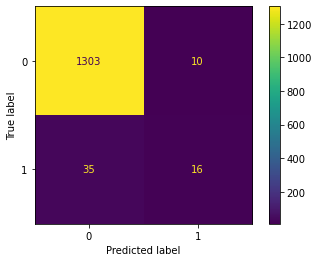

In [ ]:
ConfusionMatrixDisplay.from_estimator(

    model,
    X_test,
    y_test

);

## Let`s make a Classification report to look at the whole picture of the classification model performances. A classification report includes precision, recall, F1 score and support.

In [ ]:
print(classification_report(

    y_test,
    model.predict(X_test)

))

              precision    recall  f1-score   support



           0       0.97      0.99      0.98      1313

           1       0.62      0.31      0.42        51



    accuracy                           0.97      1364

   macro avg       0.79      0.65      0.70      1364

weighted avg       0.96      0.97      0.96      1364




## Communication

In [ ]:
features = X_test.columns
importances = model.best_estimator_.feature_importances_

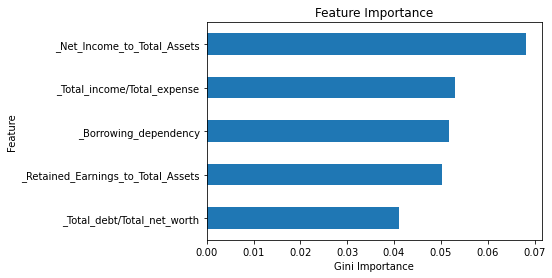

In [ ]:
feat_imp = pd.Series(importances , index=features).sort_values()
feat_imp.tail().plot(kind= 'barh')
plt.xlabel("Gini Importance")
plt.ylabel("Feature")
plt.title("Feature Importance");

In [ ]:
with open("model-1" , "wb") as f:
    pickle.dump(model ,f)